In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
import pandas as pd
import io

In [5]:
uploaded = files.upload()

Saving netflix_users.csv to netflix_users.csv


In [6]:
df = pd.read_csv("netflix_users.csv")

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB
None


In [8]:
print(df.shape)

(25000, 8)


In [9]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

In [10]:
latest_login_date = df['Last_Login'].max()

In [11]:
REFERENCE_DATE = latest_login_date + pd.Timedelta(days=1)

In [12]:
df['Days_Since_Last_Login'] = (REFERENCE_DATE - df['Last_Login']).dt.days

In [14]:
CHURN_THRESHOLD_DAYS = 30
df['Churn'] = np.where(df['Days_Since_Last_Login'] > CHURN_THRESHOLD_DAYS, 1, 0)

In [15]:
print(df[['Last_Login', 'Days_Since_Last_Login', 'Churn']].sample(5))

      Last_Login  Days_Since_Last_Login  Churn
2958  2024-03-13                    361      1
8345  2024-07-03                    249      1
499   2024-11-16                    113      1
19272 2024-08-11                    210      1
14747 2024-03-20                    354      1


In [16]:
print(df['Churn'].value_counts())

Churn
1    22919
0     2081
Name: count, dtype: int64


In [17]:
print(f"Churn Rate: {df['Churn'].mean() * 100:.2f}%")

Churn Rate: 91.68%


In [18]:
print("\n--- Churn Calculation Sample ---")
print(df[['Last_Login', 'Days_Since_Last_Login', 'Churn']].sample(5).to_markdown(index=False))

print("\n--- Churn Distribution ---")
print(df['Churn'].value_counts().to_markdown())
print(f"\nCalculated Churn Rate: {df['Churn'].mean() * 100:.2f}%")

# Save the updated DataFrame for Action 3 (EDA)
df.to_csv('netflix_users_processed.csv', index=False)


--- Churn Calculation Sample ---
| Last_Login          |   Days_Since_Last_Login |   Churn |
|:--------------------|------------------------:|--------:|
| 2025-02-22 00:00:00 |                      15 |       0 |
| 2024-11-26 00:00:00 |                     103 |       1 |
| 2025-02-08 00:00:00 |                      29 |       0 |
| 2024-11-19 00:00:00 |                     110 |       1 |
| 2024-06-06 00:00:00 |                     276 |       1 |

--- Churn Distribution ---
|   Churn |   count |
|--------:|--------:|
|       1 |   22919 |
|       0 |    2081 |

Calculated Churn Rate: 91.68%


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('netflix_users_processed.csv')

In [21]:
churn_by_sub = df.groupby('Subscription_Type')['Churn'].mean().reset_index()

In [22]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

/tmp/ipython-input-1649903316.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription_Type', y='Churn', data=churn_by_sub, palette='viridis')


<Axes: xlabel='Subscription_Type', ylabel='Churn'>

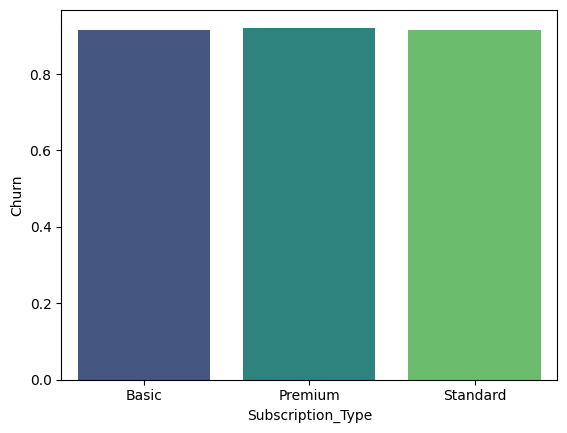

In [23]:
sns.barplot(x='Subscription_Type', y='Churn', data=churn_by_sub, palette='viridis')

Text(0.5, 1.0, 'Churn Rate by Subscription Type')

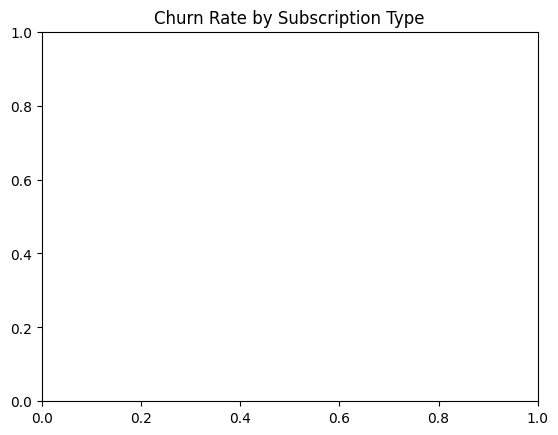

In [24]:
plt.title('Churn Rate by Subscription Type')

Text(0, 0.5, 'Churn Rate (Proportion)')

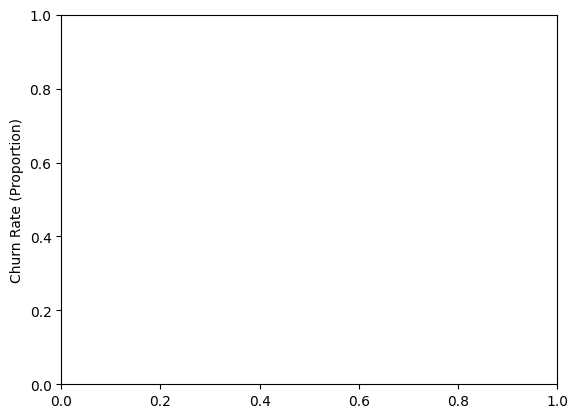

In [25]:
plt.ylabel('Churn Rate (Proportion)')

In [27]:
plt.show()

In [28]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Watch_Time_Hours', ylabel='Count'>

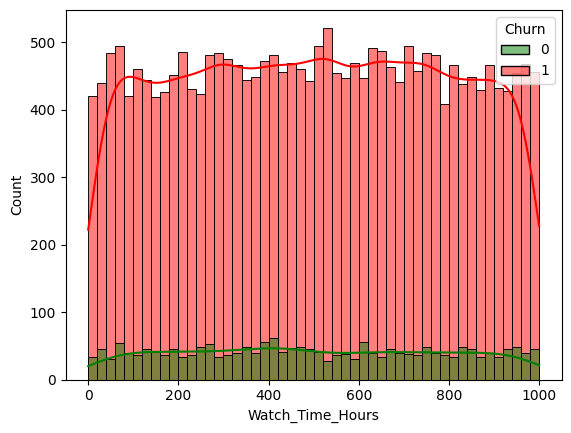

In [29]:
sns.histplot(data=df, x='Watch_Time_Hours', hue='Churn', bins=50, kde=True, palette=['green', 'red'], common_norm=False)

Text(0.5, 1.0, 'Distribution of Watch Time Hours for Active vs. Churned Users')

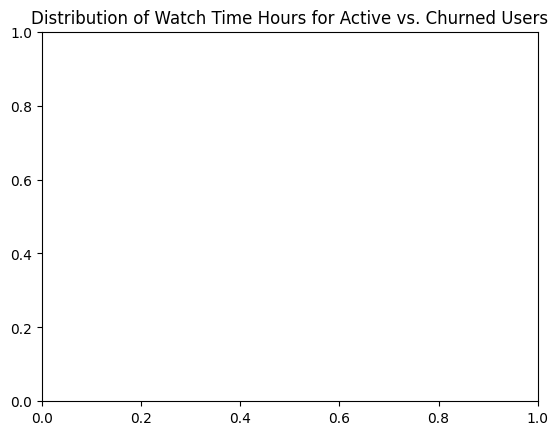

In [30]:
plt.title('Distribution of Watch Time Hours for Active vs. Churned Users')

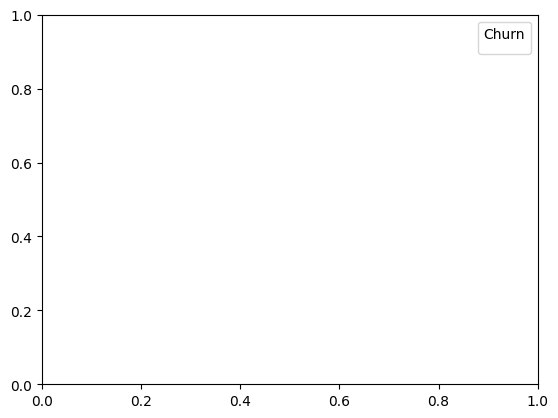

In [31]:
plt.legend(title='Churn', labels=['Active (0)', 'Churned (1)'])

In [32]:
plt.show()

/tmp/ipython-input-110245737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Favorite_Genre', ylabel='Churn'>

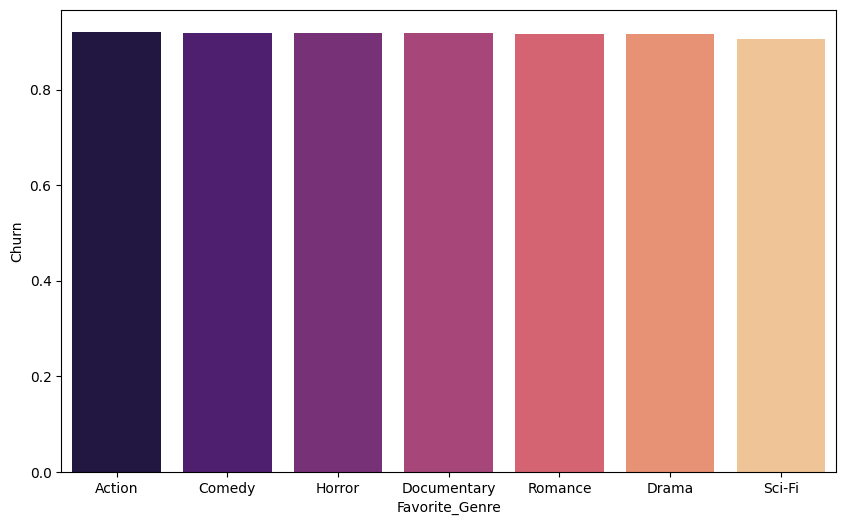

In [33]:
churn_by_genre = df.groupby('Favorite_Genre')['Churn'].mean().reset_index()

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Favorite_Genre',
    y='Churn',
    data=churn_by_genre,
    palette='magma',
    # Sort the bars by churn rate (highest to lowest) for clear comparison
    order=churn_by_genre.sort_values('Churn', ascending=False)['Favorite_Genre']
)

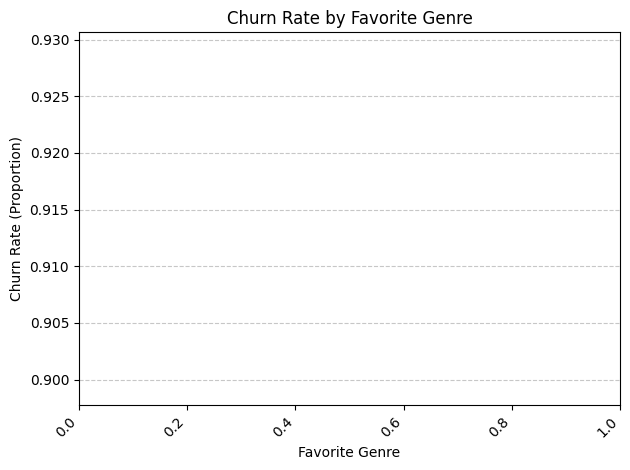

In [34]:
plt.title('Churn Rate by Favorite Genre')
plt.ylabel('Churn Rate (Proportion)')
plt.xlabel('Favorite Genre')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability

# Adjust y-limits to zoom in on the small differences for clearer visual analysis
plt.ylim(churn_by_genre['Churn'].min() * 0.99, churn_by_genre['Churn'].max() * 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
categorical_features = ['Country', 'Subscription_Type', 'Favorite_Genre']

# Apply One-Hot Encoding to convert text columns to numerical (0/1) columns
# drop_first=True prevents perfect multicollinearity
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


# --- 3. Define and Separate Final Feature Set (X) and Target (y) ---

# Columns to remove: IDs, Names, and the original date column
columns_to_drop = ['User_ID', 'Name', 'Last_Login']

# Features (X): Drop the non-predictive columns and the target column 'Churn'
X = df_encoded.drop(columns=columns_to_drop + ['Churn'], errors='ignore')

# Target (y): This is just our 'Churn' column
y = df_encoded['Churn']

# --- 4. Final Inspection ---

print("--- Final Encoded Feature Set (X) Head ---")
print(X.head().to_markdown(index=False))

print("\n--- Final Features Info (X) ---")
print(X.info())

--- Final Encoded Feature Set (X) Head ---
|   Age |   Watch_Time_Hours |   Days_Since_Last_Login | Country_Brazil   | Country_Canada   | Country_France   | Country_Germany   | Country_India   | Country_Japan   | Country_Mexico   | Country_UK   | Country_USA   | Subscription_Type_Premium   | Subscription_Type_Standard   | Favorite_Genre_Comedy   | Favorite_Genre_Documentary   | Favorite_Genre_Drama   | Favorite_Genre_Horror   | Favorite_Genre_Romance   | Favorite_Genre_Sci-Fi   |
|------:|-------------------:|------------------------:|:-----------------|:-----------------|:-----------------|:------------------|:----------------|:----------------|:-----------------|:-------------|:--------------|:----------------------------|:-----------------------------|:------------------------|:-----------------------------|:-----------------------|:------------------------|:-------------------------|:------------------------|
|    18 |              80.26 |                     301 | False           

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming X_features.csv and y_target.csv are available from Action 4

# Load the encoded features (X) and target (y)
# .squeeze() is used for the target to ensure it is a Series
X = pd.read_csv('X_features.csv')
y = pd.read_csv('y_target.csv').squeeze()

# 1. Split the data into training and testing sets
# stratify=y ensures the proportion of Churn=1 and Churn=0 is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Choose and initialize the model (Logistic Regression)
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 3. Train the model on the training data
model.fit(X_train, y_train)

# 4. Make predictions on the unseen test set
y_pred = model.predict(X_test)

# 5. Evaluate the model

print("--- Confusion Matrix ---")
# This matrix shows correct vs. incorrect predictions
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                   index=['Actual Active (0)', 'Actual Churned (1)'],
                   columns=['Predicted Active (0)', 'Predicted Churned (1)']).to_markdown())

print("\n--- Classification Report ---")
# This report shows Precision, Recall, and F1-Score for each class
print(classification_report(y_test, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'X_features.csv'

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --- ACTION 1: Load Data ---
# Load the original dataset
df = pd.read_csv('netflix_users.csv')

# --- ACTION 2: Define Churn (Target Variable Creation) ---

# Convert 'Last_Login' to datetime objects
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

# Establish a Reference Date (1 day after the latest login)
latest_login_date = df['Last_Login'].max()
REFERENCE_DATE = latest_login_date + pd.Timedelta(days=1)

# Calculate 'Days_Since_Last_Login'
df['Days_Since_Last_Login'] = (REFERENCE_DATE - df['Last_Login']).dt.days

# Define the Churn Threshold (30 days) and Create the 'Churn' Column
CHURN_THRESHOLD_DAYS = 30
df['Churn'] = np.where(df['Days_Since_Last_Login'] > CHURN_THRESHOLD_DAYS, 1, 0)

# --- ACTION 4: Feature Engineering & Cleaning (Corrected) ---

# Identify categorical features for One-Hot Encoding
categorical_features = ['Country', 'Subscription_Type', 'Favorite_Genre']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define columns to drop (redundant or non-predictive)
columns_to_drop = ['User_ID', 'Name', 'Last_Login']

# Features (X): Drop the non-predictive columns and the target column 'Churn'
# The fix: errors='ignore' ensures no KeyError if columns were already removed
X = df_encoded.drop(columns=columns_to_drop + ['Churn'], errors='ignore')

# Target (y)
y = df_encoded['Churn']

# --- ACTION 5: Model Building ---

# 1. Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize the model
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("--- Final Model Evaluation Results ---")
print("--- Confusion Matrix ---")
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                   index=['Actual Active (0)', 'Actual Churned (1)'],
                   columns=['Predicted Active (0)', 'Predicted Churned (1)']).to_markdown())

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

--- Final Model Evaluation Results ---
--- Confusion Matrix ---
|                    |   Predicted Active (0) |   Predicted Churned (1) |
|:-------------------|-----------------------:|------------------------:|
| Actual Active (0)  |                    410 |                       6 |
| Actual Churned (1) |                     13 |                    4571 |

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       416
           1       1.00      1.00      1.00      4584

    accuracy                           1.00      5000
   macro avg       0.98      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000

